In [97]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-08-18 11:57:31--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.220.8, 13.227.220.106, 13.227.220.193, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.220.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.3’

lambda_virus.fa.3   100%[===================>]  48.12K  --.-KB/s    in 0.003s  

2020-08-18 11:57:31 (15.8 MB/s) - ‘lambda_virus.fa.3’ saved [49270/49270]



In [98]:
def readGenome(filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

In [99]:
genome = readGenome('lambda_virus.fa')

In [100]:
def readFastq(filename):
  sequences = []
  qualities = []
  with open(filename) as fh:
    while True:
      fh.readline() # first line just read dont store
      seq = fh.readline().rstrip() # the second line is the sequence
      fh.readline() # third line is the "+" we dont save it
      qual = fh.readline().rstrip() # fourth line is the quality we save to qual
      if len(seq) == 0:
        break
      sequences.append(seq) # store data into sequences list
      qualities.append(qual) # store data into qualities list
  return sequences, qualities

In [101]:
def reverseComplement(s):
  complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
  t = ''
  for base in s:
    t = complement[base] + t
  return t

In [102]:
def naive(p, t):
  occurrences = []
  for i in range(len(t) - len(p) + 1):
    match = True
    for j in range(len(p)):
      if t[i+j] != p[j]:
        match = False
        break
    if match:
      occurrences.append(i)
  return occurrences

In [103]:
def naive_with_rc(p, t):
  r = reverseComplement(p)
  match = 0
  if r == p:
    return naive(p,t)
  else:
    return naive(p,t) + naive(r,t)

In [104]:
# Question 1
occurrences = naive_with_rc('AGGT', genome)
print('Occurences: %d' % len(occurences))

Occurences: 195


In [105]:
# Question 2
occurrences = naive_with_rc('TTAA', genome)
print('Occurences: %d' % len(occurences))

Occurences: 195


In [106]:
# Question 3
occurrences = naive_with_rc('ACTAAGT', genome)
print('The leftmost occurrence: %d' % min(occurrences))

The leftmost occurrence: 26028


In [107]:
# Question 4
occurrences = naive_with_rc('AGTCGA', genome)
print('The leftmost occurrence: %d' % min(occurrences))

The leftmost occurrence: 450


In [108]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        mismatch_count = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatch_count+=1

                if mismatch_count > 2:
                	match = False
                	break
        if match:
            occurrences.append(i)
    return occurrences

In [109]:
# Question 5
occurrences = naive_2mm('TTCAAGCC', genome)
print('Occurrences: %d' % len(occurrences))

Occurrences: 191


In [110]:
# Question 6
occurrences = naive_2mm('AGGAGGTT', genome)
print('Occurrences of the leftmost with up to 2 mismatches: %d' % min(occurrences))

Occurrences of the leftmost with up to 2 mismatches: 49


In [111]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-08-18 11:57:33--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.220.8, 13.227.220.106, 13.227.220.193, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.220.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.3’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.01s   

2020-08-18 11:57:33 (17.5 MB/s) - ‘ERR037900_1.first1000.fastq.3’ saved [241626/241626]



In [112]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq.2')

In [113]:
import matplotlib.pyplot as plt

In [114]:
def findGCByPos(reads):
  gc = [0] * 100
  totals = [0] * 100
  for read in reads:
    for i in range(len(read)):
      if read[i] == 'C' or read[i] == 'G':
        gc[i] += 1
        totals[i] += 1
  
  for i in range(len(reads)):
    if totals[i] > 0:
      gc[i] /= float(totals[i])

  return gc

In [115]:
def phred33ToQ(qual):
  return ord(qual) - 33

In [116]:
def createHist(qualityStrings):
  hist = [0] * 50
  for read in qualityStrings:
    for phred in read:
      q = phred33ToQ(phred)
      hist[q] += 1
  return hist

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


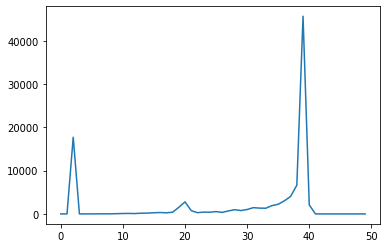

In [121]:
h = createHist(quals)
print(h)
plt.plot(range(len(h)), h)
plt.show;